In [234]:
import pandas as pd
import numpy as np

In [235]:
df = pd.read_json('./typedData/compsTypedInteraction.json')

In [236]:
agentGroup = df.groupby(['manager_id']).mean()

In [237]:
buildingGroup = df.groupby(['building_id', 'manager_id']).mean()

In [238]:
buildingAvg = buildingGroup[['interestVal']]
buildingAvg.columns = ['prob_interest_building']
buildingAvg.reset_index(inplace=True)

In [239]:
managerAvg = agentGroup[['interestVal']]
managerAvg.columns = ['prob_interest_manager']
managerAvg.reset_index(inplace=True)

In [240]:
df = df.merge(managerAvg, on='manager_id', how='left')
df = df.merge(buildingAvg, on=['building_id', 'manager_id'], how='left')

In [241]:
df['rooms'] = df['bedrooms']+df['bathrooms']

In [242]:
def pricePerRoom(row):
    if row['rooms']==0:
        return row['price']/.5
    else:
        return row['price']/row['rooms']

In [243]:
df['price_per_room'] = df[['price', 'rooms']].apply(pricePerRoom, axis=1)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 41917
Data columns (total 74 columns):
Balcony                   41918 non-null int64
Cats_Allowed              41918 non-null int64
Common_Outdoor_Space      41918 non-null int64
Dining_Room               41918 non-null int64
Dishwasher                41918 non-null int64
Dogs_Allowed              41918 non-null int64
Doorman                   41918 non-null int64
Elevator                  41918 non-null int64
Exclusive                 41918 non-null int64
Fitness_Center            41918 non-null int64
Garden_Patio              41918 non-null int64
Hardwood_Floors           41918 non-null int64
High_Speed_Internet       41918 non-null int64
Laundry_in_Unit           41918 non-null int64
New_Construction          41918 non-null int64
No_Fee                    41918 non-null int64
Outdoor_Space             41918 non-null int64
Pre_War                   41918 non-null int64
Roof_Deck                 41918 non-null int6

In [245]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [246]:
data = df.drop('interestVal', axis=1).select_dtypes(exclude=['object'])

In [247]:
X_train, X_test, y_train, y_test = train_test_split(data, df['interest_level'], test_size=0.33, random_state=42)

In [248]:
knn = KNN(n_neighbors=10, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print(classification_report(preds, y_test))

             precision    recall  f1-score   support

       high       0.06      0.27      0.10       225
        low       0.91      0.74      0.81     11955
     medium       0.19      0.36      0.25      1653

avg / total       0.81      0.68      0.73     13833



In [249]:
knn = KNN(n_neighbors=10, weights='uniform', algorithm='auto')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
cr = classification_report(preds, y_test)
print(cr)

             precision    recall  f1-score   support

       high       0.05      0.26      0.09       210
        low       0.94      0.73      0.82     12448
     medium       0.14      0.37      0.20      1175

avg / total       0.85      0.69      0.76     13833



In [250]:
accuracyUniform = []
for nn in range(1, 25):
    knn = KNN(n_neighbors=nn, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracyUniform.append((preds==y_test).sum()/len(preds))

In [251]:
accuracyDistance = []
for nn in range(1, 25):
    knn = KNN(n_neighbors=nn, weights='distance', algorithm='auto')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracyDistance.append((preds==y_test).sum()/len(preds))

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [253]:
accuracyDistance.index(np.max(accuracyDistance))

22

In [254]:
accuracyUniform.index(np.max(accuracyUniform))

23

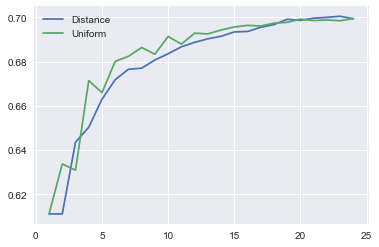

In [256]:
plt.plot(range(1, 25), accuracyDistance, label='Distance')
plt.plot(range(1, 25), accuracyUniform, label='Uniform')
plt.legend()

In [257]:
knn = KNN(n_neighbors=22, weights='uniform', algorithm='auto')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print(classification_report(preds, y_test))

             precision    recall  f1-score   support

       high       0.02      0.29      0.04        78
        low       0.97      0.72      0.82     13079
     medium       0.08      0.38      0.14       676

avg / total       0.92      0.70      0.79     13833



In [258]:
print(confusion_matrix(preds, y_test))

[[  23   26   29]
 [ 866 9383 2830]
 [ 127  289  260]]
